# Assignment 2 - Classification

In this assignment we will implement feature selection, cross validation and classification techniques. We will be using `sklearn` library to implement them. First we import the required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.svm import LinearSVC, SVC
from sklearn.cross_validation import cross_val_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score


C:\Users\AMIT\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now we get the training and test data.

In [2]:
train = pd.read_csv('E:\\MSIM\\MSIM Spring 2019\\MLTP\\Assignment 2\\training.csv')

In [3]:
test = pd.read_csv('E:\\MSIM\\MSIM Spring 2019\\MLTP\\Assignment 2\\testing.csv')

We will now see the number of variables in our dataset.

In [4]:
train.shape

(168, 148)

As we can see from the above ouput, our dataset has **148** variables.

In [5]:
train.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2.008512,565.869048,1.132976,165.569821,2.077679,2.229881,161.577083,163.672440,171.459226,10.131369,...,23.769881,3.098274,0.796488,0.665000,7.795536,1.594405,0.615357,0.014583,983.309524,1275.292917
std,0.634807,679.852886,0.489150,61.883993,0.699600,0.703572,63.407201,71.306748,67.973969,5.179409,...,12.836522,6.101883,0.103930,0.179086,0.670491,0.460627,0.239900,0.153677,880.013745,603.658611
min,1.000000,10.000000,0.020000,37.670000,1.000000,1.060000,30.680000,32.210000,40.120000,4.330000,...,4.020000,1.000000,0.330000,0.240000,6.290000,0.230000,0.070000,-0.360000,56.000000,336.730000
25%,1.537500,178.000000,0.787500,133.977500,1.547500,1.700000,91.040000,101.187500,120.165000,6.770000,...,13.965000,1.395000,0.757500,0.560000,7.357500,1.325000,0.460000,-0.080000,320.000000,817.405000
50%,1.920000,315.000000,1.085000,164.485000,1.940000,2.130000,187.560000,160.615000,178.345000,8.010000,...,21.135000,1.740000,0.810000,0.690000,7.790000,1.660000,0.620000,-0.040000,776.000000,1187.025000
75%,2.375000,667.000000,1.410000,221.895000,2.460000,2.680000,210.940000,234.815000,236.002500,11.500000,...,29.957500,2.285000,0.870000,0.810000,8.260000,1.945000,0.810000,0.120000,1412.500000,1588.427500
max,4.190000,3659.000000,2.890000,244.740000,4.700000,4.300000,246.350000,253.080000,253.320000,36.400000,...,60.020000,51.540000,0.950000,0.980000,9.340000,2.340000,1.000000,0.350000,6232.000000,3806.360000


In [6]:
first = train.head(5)

In [7]:
first

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [8]:
last = train.tail(5)

In [9]:
last

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
163,car,1.43,39,1.41,234.03,1.54,1.60,206.36,246.05,249.69,...,55.92,1.73,0.65,0.81,7.05,1.89,0.42,-0.10,66,2469.69
164,soil,1.92,141,1.24,215.19,2.02,2.02,212.28,216.28,217.00,...,18.91,3.49,0.88,0.67,7.88,1.44,0.82,0.06,990,824.01
165,grass,2.97,252,1.73,164.13,3.20,3.09,184.15,152.03,156.22,...,33.52,2.02,0.86,0.71,8.50,1.82,0.54,0.06,948,821.84
166,grass,1.57,216,1.27,164.84,1.71,1.97,192.55,148.34,153.62,...,24.49,1.13,0.76,0.85,7.75,2.11,0.30,0.09,254,1580.72
167,concrete,2.12,836,0.88,232.84,1.78,2.52,202.39,247.24,248.89,...,7.84,1.52,0.76,0.24,7.16,0.74,0.49,-0.09,3020,1611.55


In [10]:
cm = sns.light_palette("green", as_cmap=True)
df = train.corr().round(3).loc[:,:"GLCM3"]
df = df.style.background_gradient(cmap=cm)
df

# Splitting the Dataset into Target and Predictor 

In [11]:
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]

In [12]:
X_test = test.iloc[:,1:]
Y_test = test.iloc[:,0]

## Intuition behind Feature Selection method chosen and Procedure

By feature selection we delete redundant or meaningless features so that we can realize the higher generalization performance and faster classification than by the initial set of features.

In backward selection, we start from all the features and delete one feature at a time, which deteriorates the selection criterion the least. In forward selection, we start from an empty set of features and add one feature at a time, which improves the selection criterion the most.

We will be using two techniques to select the features in our dataset. They are :

* Step Forward Feature Selection using Random Forest Classifier.
* Using PCA for generating feature components.

sfs(Sequential Forward Selection) - We will define a classifier, as well as a step forward feature selector, and then perform our feature selection. The feature feature selector in mlxtend has some parameters we can define. The procedure involved in using sfs is -

1.First, we pass our classifier, the Random Forest classifier defined above the feature selector
2.Next, we define the subset of features we are looking to select (k_features=15)
3.We set the desired level of verbosity for mlxtend to report
4.Importantly, we set our scoring to accuracy; this is but one metric which could be used to score our resulting models built on the selected features
5.mlxtend feature selector uses cross validation internally, and we set our desired folds to 15 for our demonstration

We will use step forward feature selection. Here we will be using *accuracy* as our scoring metric.

Now we select the most important features.

## Random Forest based Feature Selection

Random Forest makes it very easy to measure the relative importance of each feature on the prediction.

## CV = 5 (Number of folds for the cross-validation)

In [13]:
clf1 = RandomForestClassifier()

# Build step forward feature selection
sfs1 = sfs(clf1,
           k_features=15,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

In [14]:
sfs1 = sfs1.fit(X_train, Y_train)
feat_cols1 = list(sfs1.k_feature_idx_)
print(feat_cols1)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:   44.3s finished

[2019-04-19 23:53:53] Features: 1/15 -- score: 0.548883795943[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 146 out of 146 | elapsed:   12.4s finished

[2019-04-19 23:54:06] Features: 2/15 -- score: 0.756838129191[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:   10.4s finished

[2019-04-19 23:54:16] Features: 3/15 -- score: 0.789227569816[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   10.9s finished

[2019-04-19 23:54:27] Features: 4/15 -- score: 0.826884814532[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 143 out of 143 | elapsed:   10.1s finished

[

[17, 18, 19, 40, 46, 47, 48, 51, 60, 70, 76, 80, 92, 107, 146]


[Parallel(n_jobs=1)]: Done 133 out of 133 | elapsed:    9.9s finished

[2019-04-19 23:56:19] Features: 15/15 -- score: 0.869275952805

## CV = 10 (Number of folds for the cross-validation)

In [15]:
clf2 = RandomForestClassifier() #Random Forest Implementation

# Build step forward feature selection
sfs2 = sfs(clf2,
           k_features=15,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=10)

In [16]:
sfs2 = sfs2.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:   22.5s finished

[2019-04-19 23:56:42] Features: 1/15 -- score: 0.539371184371[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 146 out of 146 | elapsed:   20.5s finished

[2019-04-19 23:57:03] Features: 2/15 -- score: 0.768058608059[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:   20.2s finished

[2019-04-19 23:57:23] Features: 3/15 -- score: 0.806862026862[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   22.8s finished

[2019-04-19 23:57:46] Features: 4/15 -- score: 0.835653235653[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 143 out of 143 | elapsed:   20.8s finished

[

The Top `15` selected features are below:

In [17]:
feat_cols = list(sfs2.k_feature_idx_)
print(feat_cols)

cols = train.columns[feat_cols]

df_final = train[cols].corr().round(3)

df_final = df_final.style.background_gradient(cmap=cm)
df_final

# Features to be selected: Column Number

[2, 6, 9, 27, 40, 52, 60, 70, 73, 92, 105, 114, 122, 132, 139]


,Area,ShpIndx,Mean_NIR,ShpIndx_40,NDVI_40,SD_G_60,Assym_60,Mean_G_80,SD_G_80,Mean_R_100,GLCM3_100,Mean_NIR_120,Dens_120,ShpIndx_140,LW_140
Area,1,-0.061,0.188,-0.134,-0.156,-0.464,0.031,0.191,-0.464,0.34,0.284,0.301,0.148,-0.171,-0.024
ShpIndx,-0.061,1,-0.191,0.719,0.226,-0.221,0.189,0.108,-0.242,-0.084,-0.245,-0.089,-0.218,0.351,0.16
Mean_NIR,0.188,-0.191,1,-0.069,-0.476,-0.09,0.129,0.604,-0.08,0.912,0.409,0.927,-0.049,-0.068,0.079
ShpIndx_40,-0.134,0.719,-0.069,1,0.17,-0.134,0.292,0.161,-0.183,-0.011,-0.181,-0.023,-0.432,0.51,0.173
NDVI_40,-0.156,0.226,-0.476,0.17,1,0.104,-0.076,0.322,0.161,-0.396,-0.33,-0.41,-0.007,0.088,-0.041
SD_G_60,-0.464,-0.221,-0.09,-0.134,0.104,1,-0.189,-0.243,0.867,-0.311,-0.145,-0.24,-0.018,-0.074,-0.062
Assym_60,0.031,0.189,0.129,0.292,-0.076,-0.189,1,0.08,-0.128,0.172,0.052,0.137,-0.551,0.219,0.348
Mean_G_80,0.191,0.108,0.604,0.161,0.322,-0.243,0.08,1,-0.214,0.703,0.193,0.667,-0.067,0.067,0.073
SD_G_80,-0.464,-0.242,-0.08,-0.183,0.161,0.867,-0.128,-0.214,1,-0.309,-0.244,-0.269,-0.068,-0.022,-0.062
Mean_R_100,0.34,-0.084,0.912,-0.011,-0.396,-0.311,0.172,0.703,-0.309,1,0.429,0.965,-0.053,-0.033,0.098


# Feature Selection with 10 fold Crossvalidation gave better accuracy scores compared to CV with 5 folds. Hence we decided to use Feature selection with 10 Cross Validation folds

## PCA Implementation

Principal Component Analysis (PCA) facilitates dimensionality reduction.We will now implement PCA on our entire dataset and not the subsetted dataset, for generating the principal components for our model.

This was not related to feature Selection and its just and indeendent experiment to see how many componenets would be good enough to get maximum explained variance. We havent used PCA for classfication in our model.

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X_t = StandardScaler().fit_transform(X_train)
pca = PCA(n_components = 10)
X = pca.fit_transform(X_t)
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100 )
components = list(range(1,11))

[ 22.87881222  19.99515707  12.16194706   7.98098367   5.59915444
   4.46740385   3.69810475   2.83170874   2.31035923   2.20652465]


Based on the above output we will select the first **10** components for our model. Below we plot the graph for the amount of variance explained by each component.

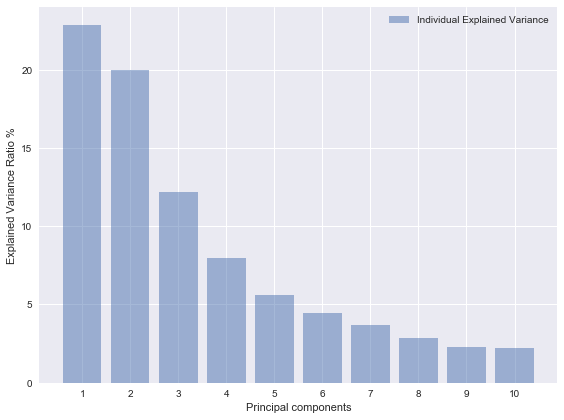

In [19]:
plt.figure(figsize=(8,6))
plt.bar(components, explained_variance*100, alpha=0.5, align='center',tick_label = [1,2,3,4,5,6,7,8,9,10],
        label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio %')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [20]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

# Subsetting the Training anf Testing Dataset based on Feature Selection.

In [21]:
X_train_final = pd.DataFrame(X_train.iloc[:,feat_cols])

In [22]:
X_train_final.head()

,Round,Mean_G,SD_G,Mean_G_40,BordLngth_40,SD_R_60,NDVI_60,Mean_R_80,SD_R_80,Mean_NIR_100,BrdIndx_120,SD_G_120,Assym_120,Mean_G_140,GLCM1_140
0,0.97,207.92,21.41,203.95,56,28.36,-0.08,237.23,28.36,240.38,1.33,27.63,0.70,203.95,0.50
1,1.56,187.85,6.57,181.91,488,19.62,-0.10,217.71,19.94,220.01,4.57,22.62,0.81,186.31,0.79
2,1.47,206.54,6.16,208.36,338,13.26,-0.07,234.48,13.26,234.43,1.93,15.35,0.81,201.51,0.76
3,1.28,204.60,5.76,204.77,878,10.36,-0.09,245.53,9.36,245.26,2.41,13.69,0.92,200.18,0.82
4,1.73,165.98,11.46,165.98,504,13.90,-0.08,203.81,16.50,204.62,3.34,17.38,1.00,172.13,0.85


In [23]:
X_test_final = pd.DataFrame(X_test.iloc[:,feat_cols])

In [24]:
X_test_final.head()

,Round,Mean_G,SD_G,Mean_G_40,BordLngth_40,SD_R_60,NDVI_60,Mean_R_80,SD_R_80,Mean_NIR_100,BrdIndx_120,SD_G_120,Assym_120,Mean_G_140,GLCM1_140
0,0.81,192.94,11.24,192.94,100,20.90,-0.10,192.34,39.49,195.03,2.75,25.25,0.96,159.45,0.80
1,0.94,36.82,8.15,38.29,196,11.89,-0.14,51.21,11.89,59.38,1.07,10.07,0.86,38.88,0.52
2,1.00,41.72,8.11,40.06,262,10.70,-0.08,46.34,11.78,53.36,2.30,14.49,0.93,59.76,0.90
3,1.91,93.13,28.60,117.16,464,27.05,0.23,72.76,27.05,65.15,2.18,47.93,0.96,86.22,0.89
4,2.05,73.17,5.41,83.66,394,23.28,-0.09,114.11,26.61,105.55,2.53,30.51,0.08,82.84,0.83


## Classification on Train and Test data using the Random Forest Classifier

In [25]:
classifier = RandomForestClassifier()

# Train the model on training data
classifier.fit(X_train_final,Y_train)

#Predicition using the Test Data 
y_pred = classifier.predict(X_test_final)

## Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

Procedure for Confusion Matrix calculation:

1. You need a test dataset or a validation dataset with expected outcome values.
2. Make a prediction for each row in your test dataset.
3. From the expected outcomes and predictions count:
    (a)The number of correct predictions for each class.
    (b)The number of incorrect predictions for each class, organized by the class that was predicted.

In [26]:
accuracyRF = accuracy_score(Y_test, y_pred, normalize=True, sample_weight=None)
print('The accuracy of the Random Forest model is : ' , accuracyRF*100, '%')

# Creating Confusion matrix to compare the prediction with actual class of the data.
cm = confusion_matrix(y_true = Y_test, y_pred=y_pred)
print('Confusion Matirx for Random Forest :-',cm)

The accuracy of the Random Forest model is :  75.3451676529 %
Confusion Matirx for Random Forest :- [[36  1  1  0  0  1  6  0  0]
 [ 0 68  3 20  0  0  2  4  0]
 [ 0  0 20  1  0  0  0  0  0]
 [ 0  7  3 77  0  0  0  5  1]
 [ 0  1  5  0 70  0  0  1  6]
 [ 0  1  0  0  1 12  0  0  0]
 [ 8  0  0  0  0  2 34  0  1]
 [ 0  1  1  1  6  0  0 11  0]
 [ 0  0  8  0 23  0  4  0 54]]


Support Vector Machines (SVM's) work best with data associated with images. This was the intuition behind utilising  SVM. The kernels that were experimented with include - linear, sigmoid, poly and rbf. 

* The RBF kernel SVM decision region is actually also a linear decision region. What RBF kernel SVM actually does is to create non-linear combinations of your features to uplift your samples onto a higher-dimensional feature space where you can use a linear decision boundary to separate your classes.

* Linear SVM is a parametric model, an RBF kernel SVM isn't, and the complexity of the latter grows with the size of the training set.

In [27]:
# Using SVM for classification. 
kernels = ['linear','poly']

for kernel in kernels:
    svc = svm.SVC(kernel = kernel).fit(X_train_final,Y_train)
    y_pred = svc.predict(X_test_final)
    accuracySVM = accuracy_score(Y_test, y_pred, sample_weight=None)
    print(kernel ,' ' ,accuracySVM)

linear   0.688362919132
poly   0.676528599606


In [28]:
cv_score = cross_val_score(classifier, X_test_final,Y_test, cv = 10)

In [29]:
cv_score.mean()

0.77501635119818557

Evaluation Metrics used - 
Precision, Recall and F-measure are the most commonly used evaluation metrics for classification problems.
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive.

In [30]:
precision_score = precision_score(Y_test, y_pred,average='macro')
print(precision_score)

0.667255932995


In [31]:
recall_score(Y_test, y_pred, average="macro")

0.72108662312157601